# Final project
## Machine Learning
### Students: Tomiris Zhaksylyk

### Content
1- Collecting Data

2- Data understanding and exploration 

3- Data cleaning

4- Data preparation: Feature Engineering and Scaling

5- Feature Selection using RFE and Model Building 

### Data scraping from kolesa.kz

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib as matplot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import math 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
data = pd.DataFrame()
attributes= pd.DataFrame()

# Define the URL of the site
base_site = "https://kolesa.kz/cars/?"
inner_site = "https://kolesa.kz/a/show/"

# Loop through website pages
for i in range(140,149):
 
    #sending a request to the webpage
    response = requests.get(base_site+"page={}".format(i),verify=False)
    
    # get the HTML from the webpage
    html = response.content
#     print(response.status_code)
    
    # convert the HTML to a Beautiful Soup object
    soup = BeautifulSoup(html, 'lxml')
    
    # Extracting the ID, car_name and price of each car on the webpage
    # Find all div tags on the webpage containing the information we want to scrape
    divs = soup.find_all('div', {'class': 'a-info-side col-right-list'})
    a = [divs.find('a', class_='list-link ddl_product_link') for divs in divs]
    ID = [a['data-product-id'] for a in a]
    car_name = [divs.find('a').string for divs in divs]
    price = [divs.find('span', class_="price").text for divs in divs]
    price = [int(''.join(price.split('                    ')[1].split('\xa0')[:-1])) for price in price]
    
    # Loop through IDs to scrape for additional information
    for k in ID:
#         print(k)
        #send request, get HTML and convert to Beautiful Soap object
        response2 = requests.get(inner_site+"{}".format(k))
        html2 = response2.content
        soup2 = BeautifulSoup(html2, 'lxml')
        h1 = soup2.find('h1', {'class': 'offer__title'})
        
        # Extracting the brand, make and year of each car based on ID
        brand = h1.find('span', itemprop="brand").string
        if h1.find('span', itemprop="name") != None:
            make = h1.find('span', itemprop="name").string
        year = int(h1.find('span', class_="year").string)

        #scrape for additional information
        div = soup2.find('div', {'class': 'offer__parameters'})   
        d={}
        for i in div.find_all('dt'):
            if i.find('span') != None:
                d['{}'.format(i.find('span').string)]=div.find('dt', title=i['title']).parent.find('dd').string.strip()
        d.update({'Марка': brand, 'Модель': make, 'Год выпуска': year})
        data1 = [d]
#         print(data1)
        #store scraped information in a 'attributes' dataframe
        attributes = attributes.append(data1,ignore_index=True,sort=False)
    
    #create new_data dataframe to store car_name, price and ID information and concatinate with master dataframe
    new_data=pd.DataFrame()
    new_data['Авто'] = car_name
    new_data['Цена'] = price
    new_data['ID'] = ID
    data = pd.concat([data,new_data], axis=0, ignore_index=True)
    
#join two dataframes by axis = 1
data = data.join(attributes)

#save dataframe to excel
data.to_excel(r'Kolesa_kz.xlsx', index = False)

/Users/tomiriszhaksylyk/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kolesa.kz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tomiriszhaksylyk/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kolesa.kz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tomiriszhaksylyk/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'kolesa.kz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/

In [15]:
df1=pd.read_excel("Kolesa1-9.xlsx")
df2=pd.read_excel('Kolesa9-18.xlsx')
df3=pd.read_excel('Kolesa19-28.xlsx')
df4=pd.read_excel('Kolesa29-38.xlsx')
df5=pd.read_excel('Kolesa39-48.xlsx')
df6=pd.read_excel('Kolesa49-58.xlsx')
df7=pd.read_excel('Kolesa59-68.xlsx')
df8=pd.read_excel('Kolesa69-78.xlsx')
df9=pd.read_excel('Kolesa79-88.xlsx')
df10=pd.read_excel('Kolesa89-98.xlsx')
df11=pd.read_excel("Kolesa_kz99-109.xlsx")
df12=pd.read_excel('Kolesa110-119.xlsx')
df13=pd.read_excel('Kolesa120-129.xlsx')
df14=pd.read_excel('Kolesa130-139.xlsx')
df15=pd.read_excel('Kolesa140-149.xlsx')

In [ ]:
df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df = df.append(df7)
df = df.append(df8)
df = df.append(df9)
df = df.append(df10)
df = df.append(df11)
df = df.append(df12)
df = df.append(df13)
df = df.append(df14)
df = df.append(df15)

In [487]:
df.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
375    False
376    False
377    False
378    False
379    False
Length: 1900, dtype: bool

In [488]:
df.isna().sum()

Авто                          0
Цена                          0
ID                            0
Город                         0
Кузов                         0
Объем двигателя, л            5
Пробег                      567
Коробка передач               0
Руль                          0
Цвет                        141
Привод                      151
Растаможен в Казахстане       0
Марка                         0
Модель                        0
Год выпуска                   0
VIN                        1789
Аварийная/Не на ходу       1891
Двигатель                  1895
dtype: int64

In [489]:
df.drop('VIN', axis=1, inplace=True)
df.drop('Аварийная/Не на ходу', axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)
df.drop('Авто', axis=1, inplace=True)

In [490]:
df['Пробег'] = df['Пробег'].str.replace('км', '', regex=True)
df['Пробег'] = df['Пробег'].str.replace(' ', '', regex=True)
df['Пробег'] = pd.to_numeric(df['Пробег'])
df

,Цена,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Марка,Модель,Год выпуска,Двигатель
0,9300000,Нур-Султан (Астана),седан,2.5 (бензин),142001.0,автомат,слева,белый металлик,передний привод,Да,Toyota,Camry,2015,NaN
1,3600000,Туркестан,кроссовер,1.7 (бензин),35700.0,механика,слева,NaN,полный привод,Да,ВАЗ (Lada),2121 Нива,2018,NaN
2,3250000,Алматы,седан,2.2 (бензин),NaN,автомат,слева,бордовый,передний привод,Да,Toyota,Camry,1999,NaN
3,1300000,Нур-Султан (Астана),седан,1.8 (бензин),350.0,автомат,слева,синий металлик,передний привод,Да,Volkswagen,Golf,1993,NaN
4,5000000,Алматы,микроавтобус,2.9 (дизель),NaN,механика,слева,белый,задний привод,Да,Mercedes-Benz,Sprinter,2004,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,13100000,Тараз,седан,2.5 (бензин),NaN,автомат,слева,черный,передний привод,Да,Toyota,Camry,2018,NaN
376,2200000,Шымкент,седан,2.5 (газ-бензин),305000.0,автомат,слева,серебристый металлик,задний привод,Да,BMW,525,1993,NaN
377,5800000,Шымкент,кроссовер,2 (бензин),125000.0,автомат,слева,серебристый металлик,передний привод,Да,Mitsubishi,Outlander,2012,NaN
378,8321000,Нур-Султан (Астана),кроссовер,2 (бензин),NaN,механика,слева,NaN,полный привод,Да,Renault,Duster,2020,NaN


In [491]:
new = df['Объем двигателя, л'].str.split(" ", n = 1, expand = True)
df['Объем двигателя, л'] = new[0].astype(float)
df['Двигатель'] = new[1].str.strip('()')
df

,Цена,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Марка,Модель,Год выпуска,Двигатель
0,9300000,Нур-Султан (Астана),седан,2.5,142001.0,автомат,слева,белый металлик,передний привод,Да,Toyota,Camry,2015,бензин
1,3600000,Туркестан,кроссовер,1.7,35700.0,механика,слева,NaN,полный привод,Да,ВАЗ (Lada),2121 Нива,2018,бензин
2,3250000,Алматы,седан,2.2,NaN,автомат,слева,бордовый,передний привод,Да,Toyota,Camry,1999,бензин
3,1300000,Нур-Султан (Астана),седан,1.8,350.0,автомат,слева,синий металлик,передний привод,Да,Volkswagen,Golf,1993,бензин
4,5000000,Алматы,микроавтобус,2.9,NaN,механика,слева,белый,задний привод,Да,Mercedes-Benz,Sprinter,2004,дизель
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,13100000,Тараз,седан,2.5,NaN,автомат,слева,черный,передний привод,Да,Toyota,Camry,2018,бензин
376,2200000,Шымкент,седан,2.5,305000.0,автомат,слева,серебристый металлик,задний привод,Да,BMW,525,1993,газ-бензин
377,5800000,Шымкент,кроссовер,2.0,125000.0,автомат,слева,серебристый металлик,передний привод,Да,Mitsubishi,Outlander,2012,бензин
378,8321000,Нур-Султан (Астана),кроссовер,2.0,NaN,механика,слева,NaN,полный привод,Да,Renault,Duster,2020,бензин


In [492]:
df['Растаможен в Казахстане'] = df['Растаможен в Казахстане'].replace({'Да': 1, 'Нет': 0})

In [493]:
df = df.rename(columns={'Руль': 'Леворулька'})
df = df.rename(columns={'Объем двигателя, л': 'Объем'})
df['Объем'] = pd.to_numeric(df['Объем'])
df['Леворулька'] = df['Леворулька'].replace({'слева': 1, 'справа': 0})


In [494]:
df.drop('Цвет', axis=1, inplace=True)

## Understanding the features and data visualization

Let's build a graph of the distribution of engine displacement, and we see that most cars have a volume of about 2 liters

/Users/zerdeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


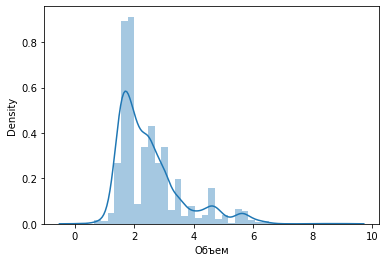

In [268]:
sns.distplot(df['Объем'])
plt.show()

Average price for cars equal to 10 millions

/Users/zerdeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density Of Cars By Price')

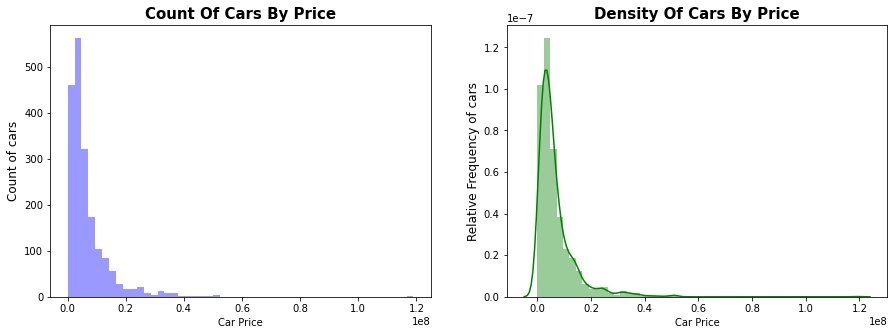

In [269]:
# target variable: price of car
fig, ax= plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Цена'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")
sns.distplot(df['Цена'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density Of Cars By Price',size=15,weight="bold")

### Price and released year of cars

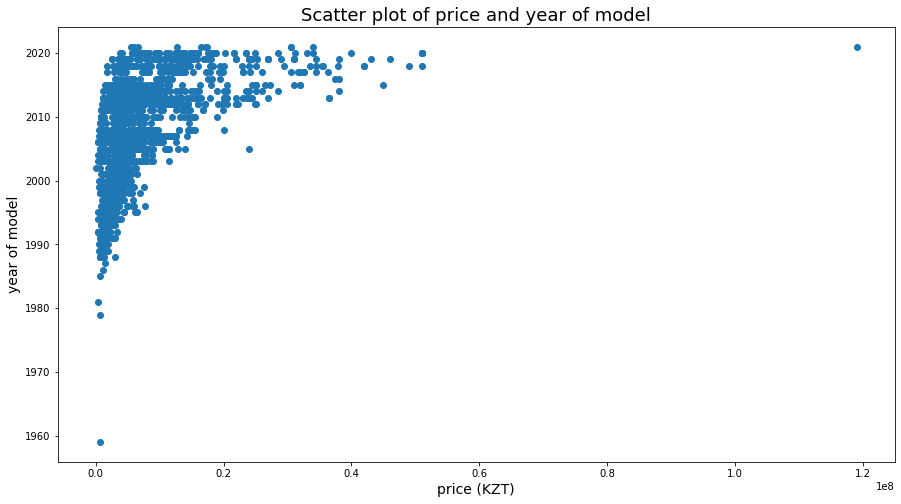

In [270]:
plt.figure(figsize=(15, 8))

plt.scatter(df["Цена"], df["Год выпуска"])
plt.xlabel("price (KZT)", fontsize=14)
plt.ylabel("year of model", fontsize=14)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

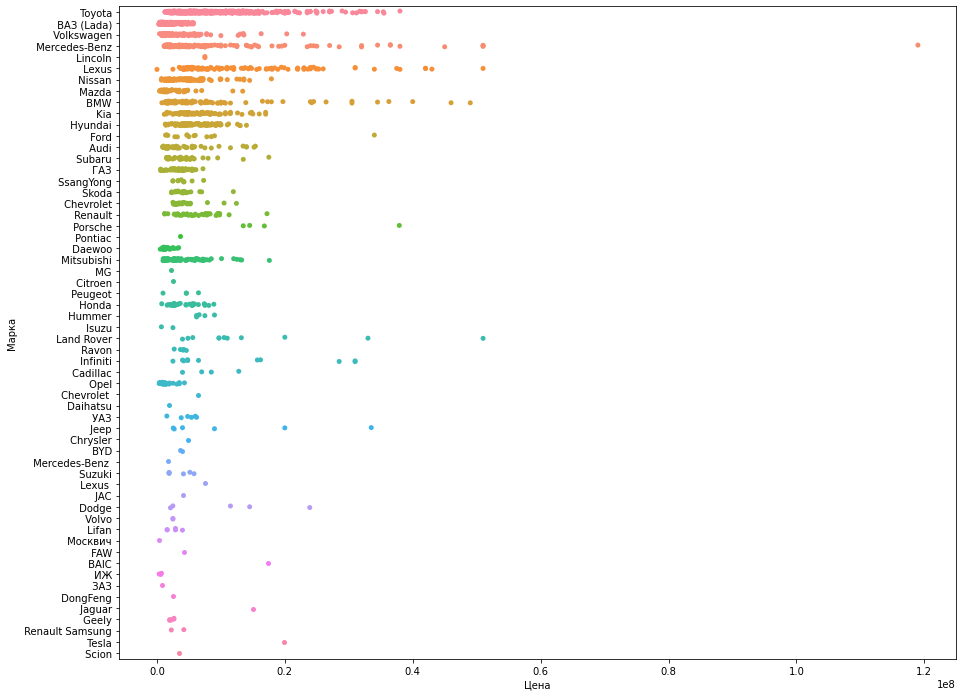

In [271]:
f, ax = plt.subplots(figsize=(15, 12))
sns.stripplot(data = df, x=df["Цена"], y=df["Марка"], jitter=.1)
plt.show()

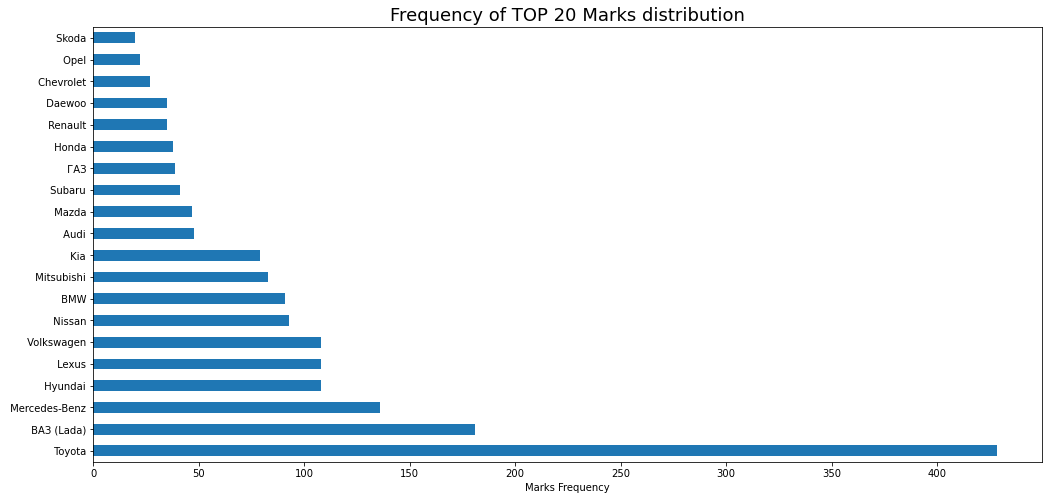

In [272]:
plt.figure(figsize=(17,8))
df.Марка.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('Marks Frequency')
plt.title("Frequency of TOP 20 Marks distribution",fontsize=18)
plt.show()

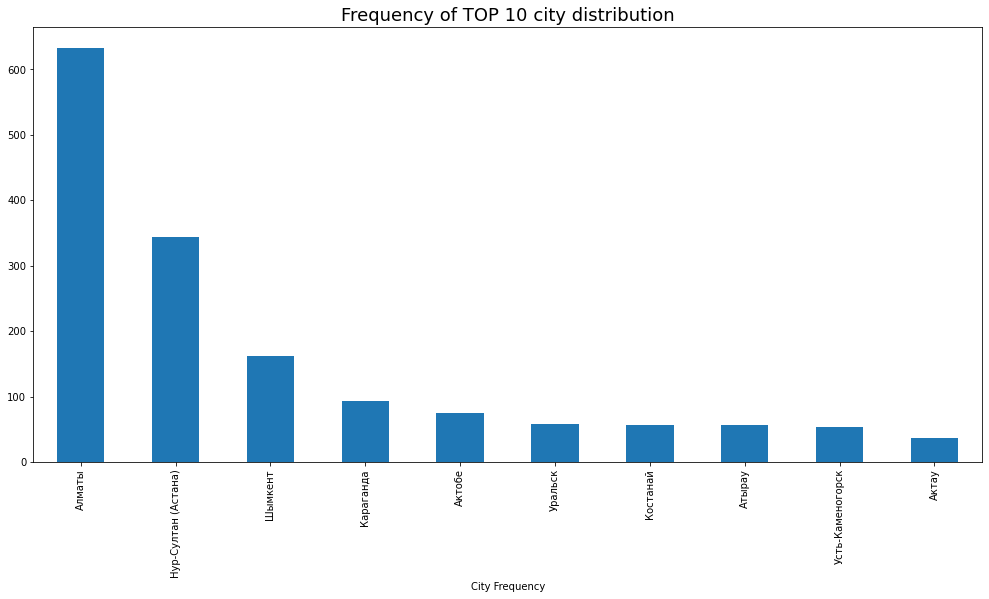

In [273]:
plt.figure(figsize=(17,8))
df.Город.value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('City Frequency')
plt.title("Frequency of TOP 10 city distribution",fontsize=18)
plt.show()

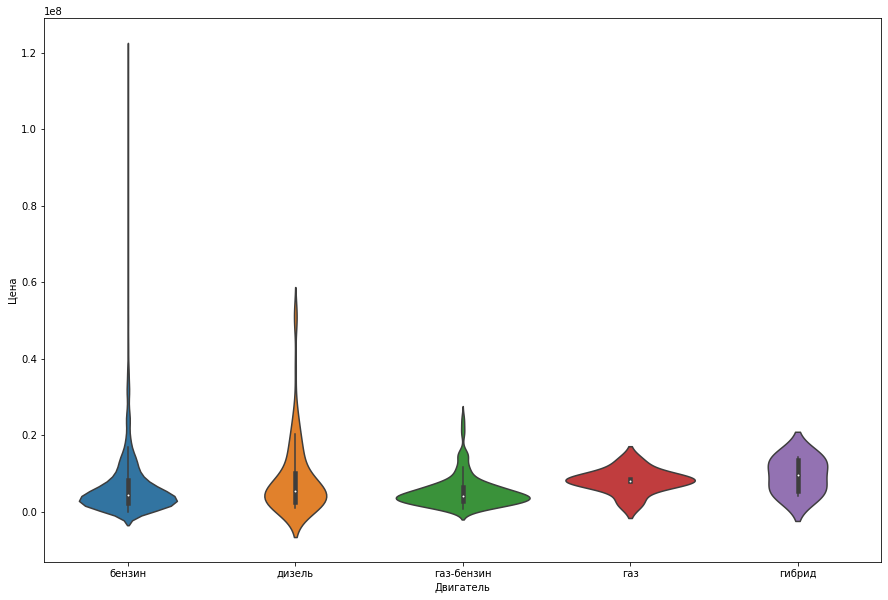

In [274]:
f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data = df, x='Двигатель', y='Цена')
plt.show()

# Checking linearity

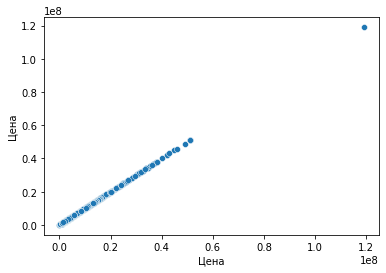

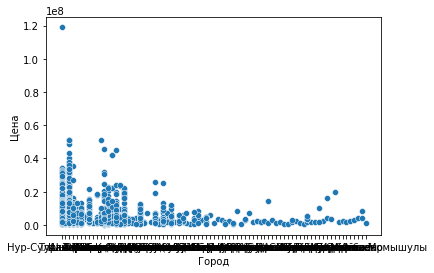

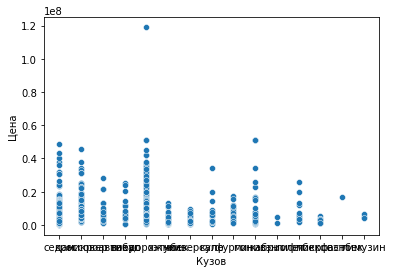

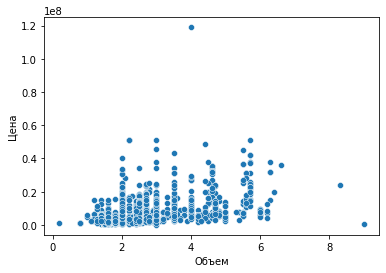

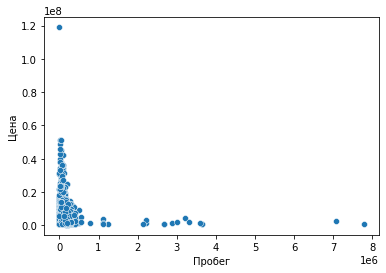

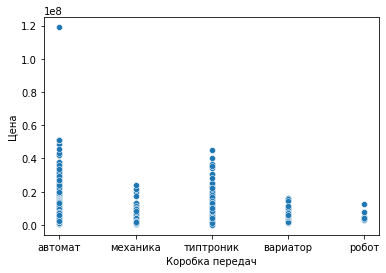

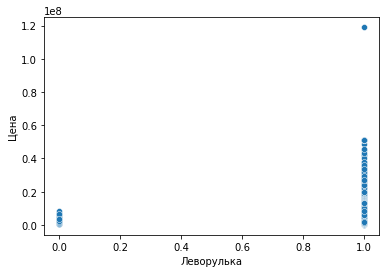

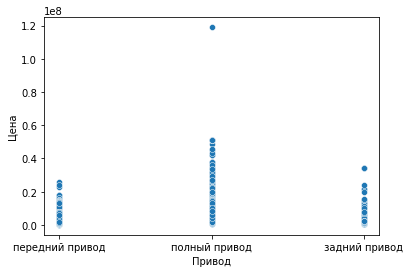

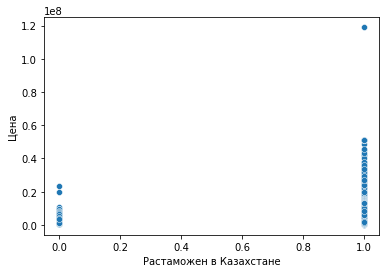

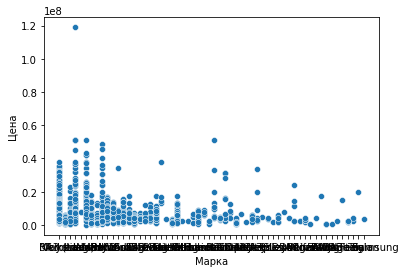

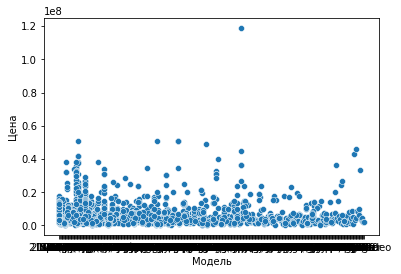

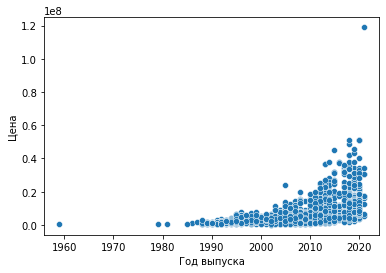

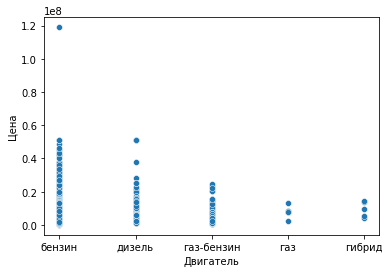

In [275]:
#checking linearity 
#to check price has linear relation or not with Independent var's

for i, col in enumerate (df.columns):
    plt.figure(i)
    sns.scatterplot(x=df[col],y=df['Цена'])

## Correlation matrix 

<AxesSubplot:>

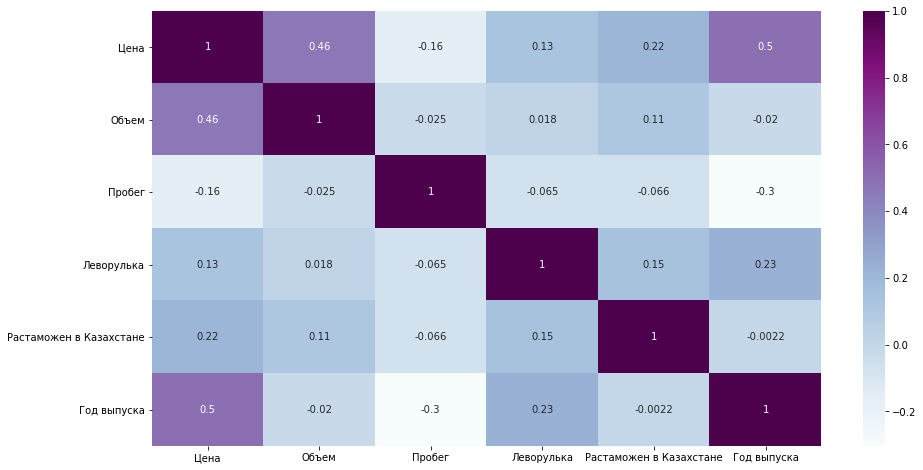

In [276]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="BuPu")

## Data cleaning

In [277]:
df1 = df.copy(deep=False)

In [278]:
df1.isna().sum()

Цена                         0
Город                        0
Кузов                        0
Объем                        5
Пробег                     567
Коробка передач              0
Леворулька                   0
Привод                     151
Растаможен в Казахстане      0
Марка                        0
Модель                       0
Год выпуска                  0
Двигатель                    5
dtype: int64

In [279]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df1.Двигатель = imputer.fit_transform(df1['Двигатель'].values.reshape(-1,1))[:,0]
df1.isna().sum()

Цена                         0
Город                        0
Кузов                        0
Объем                        5
Пробег                     567
Коробка передач              0
Леворулька                   0
Привод                     151
Растаможен в Казахстане      0
Марка                        0
Модель                       0
Год выпуска                  0
Двигатель                    0
dtype: int64

In [280]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df1.Привод = imputer.fit_transform(df1['Привод'].values.reshape(-1,1))[:,0]
df1.isna().sum()

Цена                         0
Город                        0
Кузов                        0
Объем                        5
Пробег                     567
Коробка передач              0
Леворулька                   0
Привод                       0
Растаможен в Казахстане      0
Марка                        0
Модель                       0
Год выпуска                  0
Двигатель                    0
dtype: int64

In [281]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
df1.Объем = imputer.fit_transform(df1['Объем'].values.reshape(-1,1))[:,0]
df1.isna().sum()

Цена                         0
Город                        0
Кузов                        0
Объем                        0
Пробег                     567
Коробка передач              0
Леворулька                   0
Привод                       0
Растаможен в Казахстане      0
Марка                        0
Модель                       0
Год выпуска                  0
Двигатель                    0
dtype: int64

In [282]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
df1.Пробег = imputer.fit_transform(df1['Пробег'].values.reshape(-1,1))[:,0]
df1.isna().sum()

Цена                       0
Город                      0
Кузов                      0
Объем                      0
Пробег                     0
Коробка передач            0
Леворулька                 0
Привод                     0
Растаможен в Казахстане    0
Марка                      0
Модель                     0
Год выпуска                0
Двигатель                  0
dtype: int64

In [283]:
df1.dtypes

Цена                         int64
Город                       object
Кузов                       object
Объем                      float64
Пробег                     float64
Коробка передач             object
Леворулька                   int64
Привод                      object
Растаможен в Казахстане      int64
Марка                       object
Модель                      object
Год выпуска                  int64
Двигатель                   object
dtype: object

In [284]:
df1 = pd.get_dummies(df1, dummy_na=True)

In [285]:
df1.drop('Двигатель_nan', inplace = True, axis = 1)

In [286]:
# from sklearn.impute import KNNImputer
# impute_knn = KNNImputer()
# df1 = pd.DataFrame(impute_knn.fit_transform(df1), columns=df1.columns)
# df1.isna().sum()

## Exploring the Data & Visualisation

In [287]:
df1.describe()

,Цена,Объем,Пробег,Леворулька,Растаможен в Казахстане,Год выпуска,Город_Абай (Абайский р-н),Город_Абай (Келесский р-н),Город_Акколь (Аккольский р-н),Город_Аксай,...,Модель_i30,Модель_АЗЛК 2140,Модель_ГАЗель,Модель_ГАЗель NEXT,Модель_nan,Двигатель_бензин,Двигатель_газ,Двигатель_газ-бензин,Двигатель_гибрид,Двигатель_дизель
count,1.900000e+03,1900.000000,1.900000e+03,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,...,1900.000000,1900.000000,1900.000000,1900.000000,1900.0,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,6.730227e+06,2.510068,1.807773e+05,0.926842,0.855263,2007.729474,0.001053,0.000526,0.000526,0.000526,...,0.001579,0.000526,0.017368,0.001053,0.0,0.813158,0.003684,0.122632,0.002632,0.057895
std,7.497738e+06,1.086394,3.403032e+05,0.260464,0.351928,8.428835,0.032436,0.022942,0.022942,0.022942,...,0.039715,0.022942,0.130674,0.032436,0.0,0.389887,0.060602,0.328100,0.051245,0.233606
min,1.000000e+04,0.200000,1.000000e+00,0.000000,0.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000e+06,1.600000,9.285575e+04,1.000000,1.000000,2002.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+06,2.200000,1.807773e+05,1.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000e+06,3.000000,1.807773e+05,1.000000,1.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.190000e+08,9.000000,7.777777e+06,1.000000,1.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [288]:
print("The Average Overall Price is: ", round(df1['Цена'].mean()),'tg')
print("The Price Standard Deviation is: ", round(df1['Цена'].std()))

The Average Overall Price is:  6730227 tg
The Price Standard Deviation is:  7497738


/Users/zerdeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zerdeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The Black line in Dist. Plot shows the mean at:  6730227
The Dotted line in the Dist. Plot shows the median at:  4500000
The Inter-quartile Range (IQR) is:  5500000.0
The Upper and Lower Bounds for suspected outliers in the Boxplot are 16250000.0 and -5750000.0.


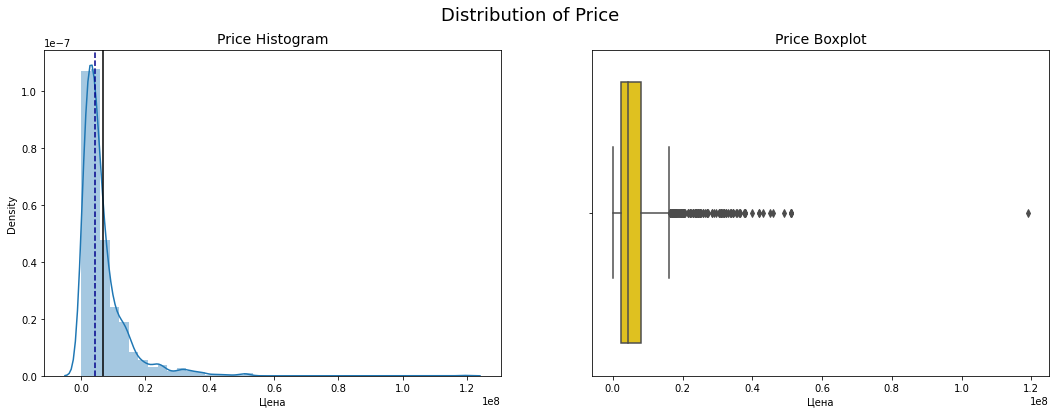

In [289]:
f, ax = plt.subplots(1,2,figsize=(18,6))
sns.distplot(df1['Цена'], ax=ax[0], bins=40, kde=True, norm_hist=True)
ax[0].axvline(np.mean(df1['Цена']), color='black')
ax[0].axvline(np.median(df1['Цена']), color='darkblue', linestyle='--')
ax[0].set_title('Price Histogram',fontsize = 14)
sns.boxplot(df1['Цена'], ax=ax[1], color='gold')
ax[1].set_title('Price Boxplot', fontsize = 14)
f.suptitle('Distribution of Price', fontsize = 18)

print("The Black line in Dist. Plot shows the mean at: ",round(df1['Цена'].mean()))
print("The Dotted line in the Dist. Plot shows the median at: ", round(df1['Цена'].median()))

#Displaying the Upper & Lower limits of the range of Salary with IQR rule.

stat = df1.Цена.describe()
#print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The Inter-quartile Range (IQR) is: ', IQR)
print('The Upper and Lower Bounds for suspected outliers in the Boxplot are {} and {}.'.format(upper, lower))

In [290]:
print(stat)

count    1.900000e+03
mean     6.730227e+06
std      7.497738e+06
min      1.000000e+04
25%      2.500000e+06
50%      4.500000e+06
75%      8.000000e+06
max      1.190000e+08
Name: Цена, dtype: float64


In [291]:
df1[df1['Цена']>16250000.0]

,Цена,Объем,Пробег,Леворулька,Растаможен в Казахстане,Год выпуска,Город_Абай (Абайский р-н),Город_Абай (Келесский р-н),Город_Акколь (Аккольский р-н),Город_Аксай,...,Модель_i30,Модель_АЗЛК 2140,Модель_ГАЗель,Модель_ГАЗель NEXT,Модель_nan,Двигатель_бензин,Двигатель_газ,Двигатель_газ-бензин,Двигатель_гибрид,Двигатель_дизель
10,32000000,6.3,62000.000000,1,1,2015,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30,32000000,6.3,62000.000000,1,1,2015,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49,38000000,5.7,51000.000000,1,1,2016,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,23600000,5.7,93500.000000,1,0,2013,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
86,20300000,2.0,14000.000000,1,1,2020,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,29500000,4.0,59701.000000,1,1,2018,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
282,27000000,5.5,95000.000000,1,1,2013,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
287,46000000,3.0,3820.000000,1,1,2019,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
310,20000000,6.4,180777.282821,1,1,2014,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Models

In [292]:
pearsonMatrix=pd.DataFrame(df1.corr(method='pearson'))
pearsonMatrix.sort_values(by='Цена',ascending=False)
pearsonMatrix

,Цена,Объем,Пробег,Леворулька,Растаможен в Казахстане,Год выпуска,Город_Абай (Абайский р-н),Город_Абай (Келесский р-н),Город_Акколь (Аккольский р-н),Город_Аксай,...,Модель_i30,Модель_АЗЛК 2140,Модель_ГАЗель,Модель_ГАЗель NEXT,Модель_nan,Двигатель_бензин,Двигатель_газ,Двигатель_газ-бензин,Двигатель_гибрид,Двигатель_дизель
Цена,1.000000,0.457977,-0.143595,0.134145,0.215257,0.498706,-0.010957,-0.001623,-0.019686,-8.358347e-03,...,-0.006085,-0.019686,-0.056012,-0.005544,NaN,0.013558,0.010881,-0.069809,0.018295,0.068582
Объем,0.457977,1.000000,-0.021033,0.017492,0.106796,-0.020255,-0.015245,0.020916,-0.021341,3.993104e-02,...,-0.033322,-0.021341,0.041425,0.008665,NaN,-0.140765,-0.024559,0.140280,0.010874,0.041898
Пробег,-0.143595,-0.021033,1.000000,-0.052796,-0.053976,-0.230196,0.002124,0.000622,-0.001401,6.948149e-19,...,-0.009949,-0.001401,-0.008938,-0.004368,NaN,-0.030010,-0.013025,0.042149,0.000101,-0.005755
Леворулька,0.134145,0.017492,-0.052796,1.000000,0.148684,0.233000,0.009120,0.006447,0.006447,6.447112e-03,...,0.011173,0.006447,0.037352,0.009120,NaN,0.072747,0.017084,0.018768,0.014431,-0.155372
Растаможен в Казахстане,0.215257,0.106796,-0.053976,0.148684,1.000000,-0.002200,-0.032778,0.009440,0.009440,-5.578248e-02,...,0.016359,0.009440,-0.025463,-0.032778,NaN,-0.020653,0.025016,-0.042305,-0.008068,0.089168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Двигатель_бензин,0.013558,-0.140765,-0.030010,0.072747,-0.020653,0.090048,-0.026080,0.011000,0.011000,1.099987e-02,...,0.019062,0.011000,-0.225675,-0.067720,NaN,1.000000,-0.126860,-0.779938,-0.107159,-0.517154
Двигатель_газ,0.010881,-0.024559,-0.013025,0.017084,0.025016,0.064838,-0.001974,-0.001395,-0.001395,-1.395440e-03,...,-0.002418,-0.001395,-0.008085,-0.001974,NaN,-0.126860,1.000000,-0.022734,-0.003124,-0.015075
Двигатель_газ-бензин,-0.069809,0.140280,0.042149,0.018768,-0.042305,-0.069305,0.037346,-0.008579,-0.008579,-8.579218e-03,...,-0.014867,-0.008579,0.294199,0.086827,NaN,-0.779938,-0.022734,1.000000,-0.019204,-0.092679
Двигатель_гибрид,0.018295,0.010874,0.000101,0.014431,-0.008068,0.011402,-0.001667,-0.001179,-0.001179,-1.178740e-03,...,-0.002043,-0.001179,-0.006829,-0.001667,NaN,-0.107159,-0.003124,-0.019204,1.000000,-0.012734


### Linear Regression

In [311]:
x = df1.drop('Цена', 1)
y = df1['Цена']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)
linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred=(linreg.predict(x_test))
y_pred1 = (linreg.predict(x_train))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print(r2)
r21 = metrics.r2_score(y_train, y_pred1)
print(r21)

2532292.1815783726
27372962719010.95
0.6551748467052634
0.8987301776291247


In [104]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
x = df1.drop('Цена', 1)
y = df1['Цена']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, x, y, cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.650 (0.149)


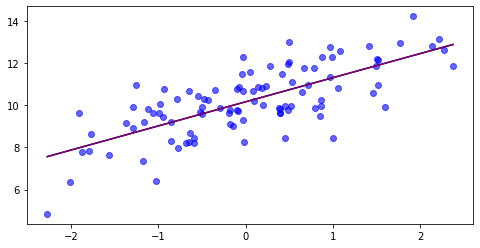

In [44]:
import statsmodels.api as sm
x = np.random.randn(100)
y = x + np.random.randn(100) + 10

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y, alpha=0.6, color='blue')

x_matrix = sm.add_constant(x)
model = sm.OLS(y, x_matrix)
regression_results = model.fit()
x_pred = np.linspace(x.min(), x.max(), 50)
x_matrix = sm.add_constant(x_pred)
y_pred = regression_results.predict(x_matrix)

ax.plot(x_pred, y_pred, color='black')
coef = regression_results.params[1]    
const = regression_results.params[0]
y_pred = model.predict(params=[const, coef], exog=x_matrix)
ax.plot(x_pred, y_pred, color='purple')

plt.show()
plt.close()

In [244]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Mean Values')
    plt.show()
    plt.close()
    Title = 'Distribution Plot of Actual Values vs. Predicted Values'
# DistributionPlot(y_test, y_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

### Random Forest

In [253]:
x = df1.drop('Цена', 1)
y = df1['Цена']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

model = RandomForestRegressor(n_estimators = 2,
  random_state = 0)
model.fit(x_train,y_train)
preds = model.predict(x_test)
preds1 = model.predict(x_train)
#     return
print(r2_score(y_test,preds))
print(r2_score(y_train,preds1))
# print(check(x_train,x_test,y_train,y_test))
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
scores = cross_val_score(model, x, y, cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

0.7100640580580286
0.933874013709006
Accuracy: 0.770 (0.166)


/Users/zerdeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/zerdeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


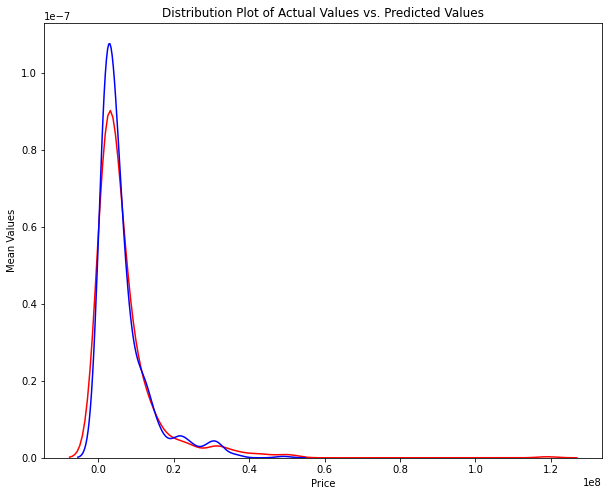

In [47]:
Title = 'Distribution Plot of Actual Values vs. Predicted Values'
DistributionPlot(y_test, preds, "Actual Values (Train)", "Predicted Values (Train)", Title)

### Kneighbors

In [107]:
X = df1.drop('Цена', 1)
y = df1['Цена']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train) #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6588544.927190654
RMSE value for k=  2 is: 5980118.907490594
RMSE value for k=  3 is: 6223830.286786212
RMSE value for k=  4 is: 6292380.747262104
RMSE value for k=  5 is: 6426540.154344843
RMSE value for k=  6 is: 6495229.536500066
RMSE value for k=  7 is: 6523788.458675171
RMSE value for k=  8 is: 6603859.101056452
RMSE value for k=  9 is: 6618990.932775533
RMSE value for k=  10 is: 6671534.140941454
RMSE value for k=  11 is: 6714416.737104829
RMSE value for k=  12 is: 6762398.982892191
RMSE value for k=  13 is: 6820302.63125781
RMSE value for k=  14 is: 6883015.567685641
RMSE value for k=  15 is: 6929425.0196141135
RMSE value for k=  16 is: 6987848.842368563
RMSE value for k=  17 is: 7042108.550202884
RMSE value for k=  18 is: 7081068.313475257
RMSE value for k=  19 is: 7141477.662795045
RMSE value for k=  20 is: 7180870.2845639875


In [108]:
reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(X_train, y_train)
y_hat_knn = reg.predict(X_test)
y_hat_knn1 = reg.predict(X_train)

In [109]:
mse_knn= mean_squared_error(y_test, y_hat_knn)
print("Test Data MSE: ", mse_knn)
print('R2 score for test: ' , r2_score(y_test, y_hat_knn))
print('R2 score for train:   ' , r2_score(y_train, y_hat_knn1))

Test Data MSE:  35761822147726.5
R2 score for test:  0.5494979505589132
R2 score for train:   0.8694717797153965


/Users/zerdeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/zerdeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


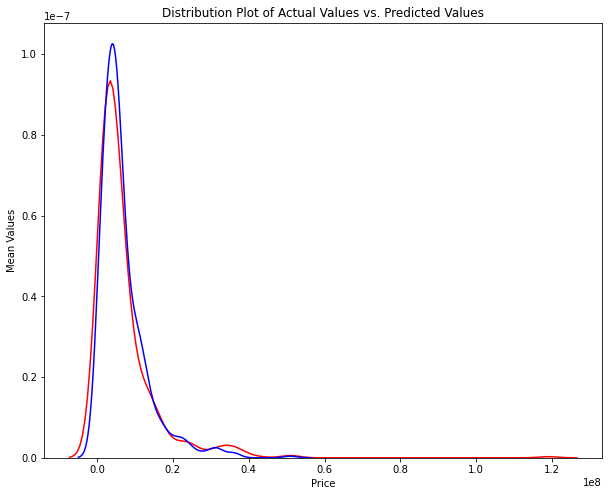

In [51]:
Title = 'Distribution Plot of Actual Values vs. Predicted Values'
DistributionPlot(y_test, y_hat_knn, "Actual Values (Train)", "Predicted Values (Train)", Title)

## Decision Tree Regression

In [139]:
X = df1.drop('Цена', 1)
y = df1['Цена']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dtr = DecisionTreeRegressor(max_features='auto')
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
dtr.fit(X_train, y_train)
predicted = dtr.predict(X_test)

In [140]:
print('MAE: ', metrics.mean_absolute_error(y_test, predicted))
print('MSE: ',metrics.mean_squared_error(y_test, predicted))
print('R2 score for test: ' , r2_score(y_test, predicted))
predicted1 = dtr.predict(X_train)
print('R2 score for train: ' , r2_score(y_train, predicted1))


MAE:  1699241.6807017543
MSE:  28159643138250.824
R2 score for test:  0.6452648052185974
R2 score for train:  0.9999902272191528


In [141]:
# print(check(x_train,x_test,y_train,y_test))
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
scores = cross_val_score(dtr, X, y, cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.777 (0.088)


/Users/zerdeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/zerdeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


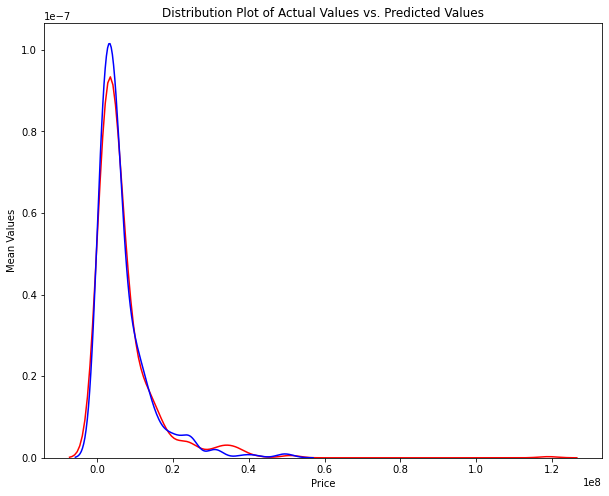

In [94]:
Title = 'Distribution Plot of Actual Values vs. Predicted Values'
DistributionPlot(y_test, predicted, "Actual Values (Train)", "Predicted Values (Train)", Title)

### Feature Importance

In [142]:
X = df1.drop('Цена', 1)
y = df1['Цена']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

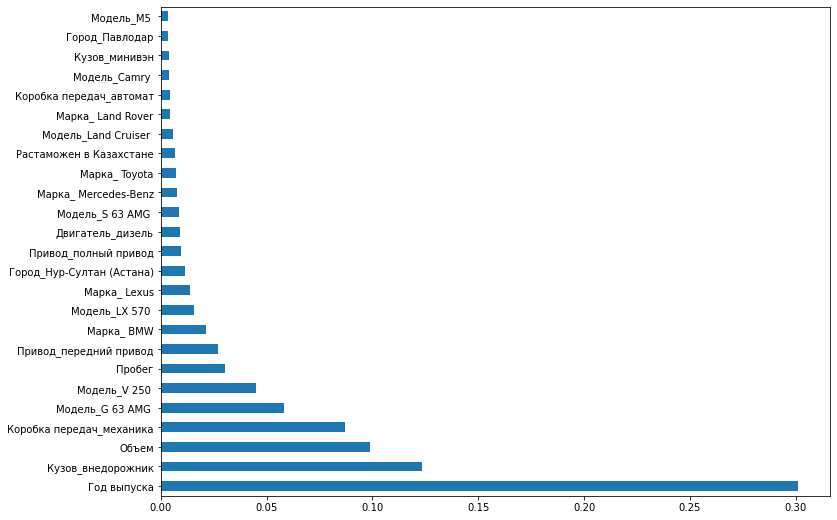

In [143]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize = (12, 9))
plt.show()

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [145]:
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [146]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [147]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [148]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=0, n_jobs = 1)

In [149]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   3.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   3.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=   4.0s
[CV] n_estimators=400, min_samples_split=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [150]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [151]:
rf_random.best_score_

-7044691923437.928

In [152]:
predictions=rf_random.predict(X_test)

/Users/zerdeli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Цена', ylabel='Density'>

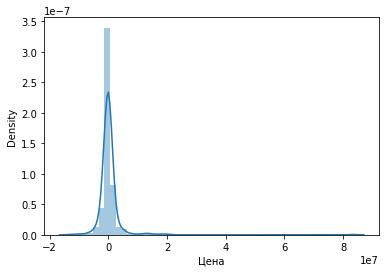

In [153]:
sns.distplot(y_test-predictions)

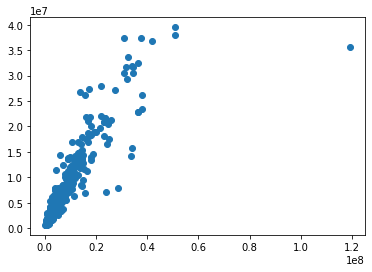

In [154]:
plt.scatter(y_test,predictions)

In [155]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
predictions1 = rf_random.predict(X_train)
r21 = metrics.r2_score(y_train, predictions1)
print("R-square for train:" ,r21)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
r2 = metrics.r2_score(y_test, predictions)
print("R-square for test: ",r2)

MAE: 1460209.5423509565
MSE: 19850437289235.598
R-square for train: 0.9560815835037682
RMSE: 4455382.956518508
R-square for test:  0.749938282110971


## Pipeline

In [227]:
X = df1.drop('Цена', 1)
y = df1['Цена']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pipe3 = Pipeline([
('reducer', PCA(n_components=30, svd_solver='full')),
# ('reducer',TruncatedSVD( n_components=20, random_state=0)),
('scale',StandardScaler()),
('feature_selection',SelectFromModel(ExtraTreesClassifier(n_estimators=20))),
('transformation', PolynomialFeatures(include_bias = False)),
('model', RandomForestRegressor(n_estimators = 200,
  random_state = 0,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'auto',
 max_depth = 15))])
#('model', LinearRegression())])



pipe3.fit(X_train, y_train)
print("R2 for test: " , pipe3.score(X_test, y_test))
print("R2 for train: " , pipe3.score(X_train, y_train))

R2 for test:  0.7440618969108803
R2 for train:  0.9616266611446085


In [234]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
scores = cross_val_score(pipe3, X, y, cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.821 (0.084)


# Conclusion

In [254]:
d1 = {'Model': ['Linear Regression', 'Random Forest', 'K neighbours', 'Decission Tree Regressor', 
               'Extra Trees Regressor', 'Pipeline'],
    'R2_test': [-8.06, 71, 54.95, 64.53, 74.99, 74.4],
     'R2_train': [83.71, 93.39, 86.95, 99.99, 95.61, 96.16],
     'Crossvalidation_score': [65.0, 77.0,'-',77.7,'-', 82.1]}
df_conclusion = pd.DataFrame(data=d1)

In [255]:
df_conclusion

,Model,R2_test,R2_train,Crossvalidation_score
0,Linear Regression,-8.06,83.71,65
1,Random Forest,71.00,93.39,77
2,K neighbours,54.95,86.95,-
3,Decission Tree Regressor,64.53,99.99,77.7
4,Extra Trees Regressor,74.99,95.61,-
5,Pipeline,74.40,96.16,82.1


In [293]:
df1

,Цена,Объем,Пробег,Леворулька,Растаможен в Казахстане,Год выпуска,Город_Абай (Абайский р-н),Город_Абай (Келесский р-н),Город_Акколь (Аккольский р-н),Город_Аксай,...,Модель_i30,Модель_АЗЛК 2140,Модель_ГАЗель,Модель_ГАЗель NEXT,Модель_nan,Двигатель_бензин,Двигатель_газ,Двигатель_газ-бензин,Двигатель_гибрид,Двигатель_дизель
0,9300000,2.5,142001.000000,1,1,2015,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3600000,1.7,35700.000000,1,1,2018,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3250000,2.2,180777.282821,1,1,1999,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1300000,1.8,350.000000,1,1,1993,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5000000,2.9,180777.282821,1,1,2004,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,13100000,2.5,180777.282821,1,1,2018,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
376,2200000,2.5,305000.000000,1,1,1993,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
377,5800000,2.0,125000.000000,1,1,2012,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
378,8321000,2.0,180777.282821,1,1,2020,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


After trying five different regression models as a baseline model, Random Forest regression was chosen. Then, with adding preprocessing elements, such as feature selection, extraction, standartization and transformation, 82.1 cross validation score was reached.

In [294]:
d2 = {'Цена': ['28850000'], 'Объем': [2], 'Пробег': [0], 'Леворулька': [1], 'Растоможен в Казахстане': [1], 
     'Год выпуска': [2020],'Name': ['Audi Q3 Sportback']}

df2 = pd.DataFrame(data=d2)

In [295]:
df2

,Цена,Объем,Пробег,Леворулька,Растоможен в Казахстане,Год выпуска,Name
0,28850000,2,0,1,1,2020,Audi Q3 Sportback


In [296]:
df2.drop('Name', axis=1, inplace=True)
df2

,Цена,Объем,Пробег,Леворулька,Растоможен в Казахстане,Год выпуска
0,28850000,2,0,1,1,2020


In [ ]:
poly_model = pipe.fit(x,y)
pred_pipe = pipe.predict(x)
joblib.dump(poly_model, df)
load_model = joblib.load(filename)
predict = load_model.predict(salary_predict)

In [349]:
df

,Цена,Город,Кузов,Объем,Пробег,Коробка передач,Леворулька,Привод,Растаможен в Казахстане,Марка,Модель,Год выпуска,Двигатель
0,9300000,Нур-Султан (Астана),седан,2.5,142001.000000,автомат,1,передний привод,1,Toyota,Camry,2015,бензин
1,28850000,Алматы,кроссовер,2.0,0.000000,автомат,1,полный привод,1,Audi,Q3,2020,бензин
2,3250000,Алматы,седан,2.2,180777.282821,автомат,1,передний привод,1,Toyota,Camry,1999,бензин
3,1300000,Нур-Султан (Астана),седан,1.8,350.000000,автомат,1,передний привод,1,Volkswagen,Golf,1993,бензин
4,5000000,Алматы,микроавтобус,2.9,180777.282821,механика,1,задний привод,1,Mercedes-Benz,Sprinter,2004,дизель
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,13100000,Тараз,седан,2.5,180777.282821,автомат,1,передний привод,1,Toyota,Camry,2018,бензин
376,2200000,Шымкент,седан,2.5,305000.000000,автомат,1,задний привод,1,BMW,525,1993,газ-бензин
377,5800000,Шымкент,кроссовер,2.0,125000.000000,автомат,1,передний привод,1,Mitsubishi,Outlander,2012,бензин
378,8321000,Нур-Султан (Астана),кроссовер,2.0,180777.282821,механика,1,полный привод,1,Renault,Duster,2020,бензин


In [495]:
df6 = df.copy(deep = False)
df6

,Цена,Город,Кузов,Объем,Пробег,Коробка передач,Леворулька,Привод,Растаможен в Казахстане,Марка,Модель,Год выпуска,Двигатель
0,9300000,Нур-Султан (Астана),седан,2.5,142001.0,автомат,1,передний привод,1,Toyota,Camry,2015,бензин
1,3600000,Туркестан,кроссовер,1.7,35700.0,механика,1,полный привод,1,ВАЗ (Lada),2121 Нива,2018,бензин
2,3250000,Алматы,седан,2.2,NaN,автомат,1,передний привод,1,Toyota,Camry,1999,бензин
3,1300000,Нур-Султан (Астана),седан,1.8,350.0,автомат,1,передний привод,1,Volkswagen,Golf,1993,бензин
4,5000000,Алматы,микроавтобус,2.9,NaN,механика,1,задний привод,1,Mercedes-Benz,Sprinter,2004,дизель
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,13100000,Тараз,седан,2.5,NaN,автомат,1,передний привод,1,Toyota,Camry,2018,бензин
376,2200000,Шымкент,седан,2.5,305000.0,автомат,1,задний привод,1,BMW,525,1993,газ-бензин
377,5800000,Шымкент,кроссовер,2.0,125000.0,автомат,1,передний привод,1,Mitsubishi,Outlander,2012,бензин
378,8321000,Нур-Султан (Астана),кроссовер,2.0,NaN,механика,1,полный привод,1,Renault,Duster,2020,бензин


In [496]:
df6.loc[0] = [6000000,'Алматы', 'седан', 1.6, 0,'автомат', 1,'передний привод', 1,'Volkswagen','Polo',2018,'бензин']

In [497]:
df6

,Цена,Город,Кузов,Объем,Пробег,Коробка передач,Леворулька,Привод,Растаможен в Казахстане,Марка,Модель,Год выпуска,Двигатель
0,6000000,Алматы,седан,1.6,0.0,автомат,1,передний привод,1,Volkswagen,Polo,2018,бензин
1,3600000,Туркестан,кроссовер,1.7,35700.0,механика,1,полный привод,1,ВАЗ (Lada),2121 Нива,2018,бензин
2,3250000,Алматы,седан,2.2,NaN,автомат,1,передний привод,1,Toyota,Camry,1999,бензин
3,1300000,Нур-Султан (Астана),седан,1.8,350.0,автомат,1,передний привод,1,Volkswagen,Golf,1993,бензин
4,5000000,Алматы,микроавтобус,2.9,NaN,механика,1,задний привод,1,Mercedes-Benz,Sprinter,2004,дизель
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,13100000,Тараз,седан,2.5,NaN,автомат,1,передний привод,1,Toyota,Camry,2018,бензин
376,2200000,Шымкент,седан,2.5,305000.0,автомат,1,задний привод,1,BMW,525,1993,газ-бензин
377,5800000,Шымкент,кроссовер,2.0,125000.0,автомат,1,передний привод,1,Mitsubishi,Outlander,2012,бензин
378,8321000,Нур-Султан (Астана),кроссовер,2.0,NaN,механика,1,полный привод,1,Renault,Duster,2020,бензин


In [498]:
df6 = pd.get_dummies(df6, dummy_na=True)

In [499]:
df7 = df6.loc[0]
df7

,Цена,Объем,Пробег,Леворулька,Растаможен в Казахстане,Год выпуска,Город_Абай (Абайский р-н),Город_Абай (Келесский р-н),Город_Акколь (Аккольский р-н),Город_Аксай,...,Модель_АЗЛК 2140,Модель_ГАЗель,Модель_ГАЗель NEXT,Модель_nan,Двигатель_бензин,Двигатель_газ,Двигатель_газ-бензин,Двигатель_гибрид,Двигатель_дизель,Двигатель_nan
0,6000000,1.6,0.0,1,1,2018,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0,6000000,1.6,0.0,1,1,2018,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0,6000000,1.6,0.0,1,1,2018,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0,6000000,1.6,0.0,1,1,2018,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0,6000000,1.6,0.0,1,1,2018,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [503]:
X = df6.drop('Цена', 1)
y = df6['Цена']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pipe3 = Pipeline([
('reducer', PCA(n_components=3)),
# ('reducer',TruncatedSVD( n_components=20, random_state=0)),
('scale',StandardScaler()),
('feature_selection',SelectFromModel(ExtraTreesClassifier(n_estimators=20))),
('transformation', PolynomialFeatures(include_bias = False)),
('model', RandomForestRegressor(n_estimators = 200,
  random_state = 0,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'auto',
 max_depth = 15))])
#('model', LinearRegression())])


In [471]:
X = df6.drop('Цена', 1)
y = df6['Цена']

In [472]:
X.dropna(inplace = True)
y.dropna(inplace = True)

In [500]:
df7 = df6.drop('Цена', 1)

In [501]:
df6.dropna(inplace = True)

In [502]:
df7.dropna(inplace = True)

In [504]:
model=pipe3.fit(X,y)


In [505]:
pred=pipe3.predict(df7)

In [506]:
pred

array([5901260.04226329, 6914372.72603174, 1296874.65262515, ...,
       2135951.78710179, 5320067.40079365, 2270572.08152958])

In [414]:
28850000 - 28185321.11219336

664678.8878066391

In [344]:
model.score(x_test, y_test)

0.6657941860525047

In [345]:
y_predict = model.predict(x_test)
print(y_predict)

[ 1.12786206e+05  2.95982600e+06  2.40905005e+07  5.46512105e+06
  8.46937960e+06 -1.45302565e+04  5.70000002e+06  7.01199357e+06
  2.83216778e+06  5.50742845e+06  2.49841707e+06  1.25565836e+07
  7.15397897e+06  1.68951603e+07  1.77877304e+07  7.93405785e+04
  1.68406961e+07  1.93505543e+06  1.06700219e+07  1.77851938e+06
  9.93028844e+06  1.15912308e+07  1.45807808e+07  1.37651231e+07
  2.43985585e+07  1.40631450e+07  1.31748774e+06  9.28059676e+05
  3.77472529e+06  7.00056500e+05  6.16686591e+06  7.60530726e+06
  1.18121525e+07  6.03375586e+06  1.02359538e+07  2.17190286e+07
  5.63552130e+05  2.61668803e+06  3.12888862e+05 -3.94371385e+05
 -4.03209261e+05  8.01240143e+05  1.64074797e+06  1.35257529e+07
  7.36291465e+05  3.18897716e+06  7.13929955e+06  5.22657381e+06
  8.29717990e+06  1.38071153e+07  6.21533018e+06  6.56185339e+06
  4.23602163e+06  1.44017588e+07 -4.46735987e+04  6.91552986e+06
  1.33485578e+07  6.88274022e+06  2.58997061e+07  4.72848021e+06
 -1.08285873e+06  1.68278

In [346]:
df_price = pd.DataFrame({'Price1': y_test, 'Price2': y_predict})
df_price

,Price1,Price2
51,900000,1.127862e+05
287,1600000,2.959826e+06
11,32500000,2.409050e+07
85,4550000,5.465121e+06
87,4700000,8.469380e+06
...,...,...
239,4200000,5.958104e+06
76,3400000,2.537468e+06
68,5300000,5.237162e+06
40,5500000,6.262610e+06


In [347]:
df_price[df_price['Price1']=="28850000"]

,Price1,Price2
